# Функции активации:

In [15]:
def binary_step(num):
    if num < 0:
        return 0
    elif num >= 0:
        return 1

In [16]:
def sigmoid(num):
    return 1 / (1 + np.exp(-num))

In [17]:
def tanh(num):
    return (np.exp(num) - np.exp(-num)) / (np.exp(num) + np.exp(-num))

In [18]:
def ReLU(num):
    if num < 0:
        return 0
    elif num >= 0:
        return num

In [19]:
def softplus(num):
    return np.log(1 + np.exp(num))

In [20]:
def leaky_ReLU(num):
    k = 0.01
    
    if num < 0:
        return num * k
    elif num >= 0:
        return num

# Код Нейронной сети:

In [21]:
from sklearn import datasets
from pandas import DataFrame
import matplotlib.pyplot as plt

iris = datasets.load_iris()
iris_frame = DataFrame(iris.data) 
iris_frame.columns = iris.feature_names

iris_frame['target'] = iris.target 
iris_frame['name'] = iris_frame.target.apply(lambda x: iris.target_names[x])

print(iris_frame)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target       name  
0 

In [44]:
import numpy as np

np.random.seed(2021) # Сид для генерации одинаковых весов

weight_1_2 = np.random.randn(4, 5)
weight_2_3 = np.random.randn(5, 3)

In [45]:
all_errors = list()

for iteration in range(3000):
    for _ in range(len(iris_frame["sepal length (cm)"])):
        i = np.random.randint(150)
        inp = [iris_frame["sepal length (cm)"][i], iris_frame["sepal width (cm)"][i], 
            iris_frame["petal length (cm)"][i], iris_frame["petal width (cm)"][i]]

        if iris_frame["target"][i] == 0:
            goal_pred = [1, 0, 0]
        elif iris_frame["target"][i] == 1:
            goal_pred = [0, 1, 0]
        elif iris_frame["target"][i] == 2:
            goal_pred = [0, 0, 1]

        layer_2 = np.dot(inp, weight_1_2)
        pred = [leaky_ReLU(i) for i in np.dot(layer_2, weight_2_3)]

        layer_3_delta = np.array([pred[i] - goal_pred[i] for i in range(3)])
        layer_2_delta = np.sum(np.dot(layer_3_delta, weight_2_3.T))
        try:
            all_errors.append(np.sum(layer_3_delta) ** 2)
        except:
            pass
        
        weight_delta_1_2 = np.zeros(weight_1_2.shape)
        weight_delta_2_3 = np.zeros(weight_2_3.shape)

        for k in range(len(weight_delta_1_2)):
            for j in range(len(weight_delta_1_2[k])):
                weight_delta_1_2[k][j] = inp[k] * layer_2_delta

        for k in range(len(weight_delta_2_3)):
            for j in range(len(weight_delta_2_3[k])):
                weight_delta_2_3[k][j] = np.sum(layer_2[k]) * layer_3_delta[j]

        for k in range(len(weight_1_2)):
            for j in range(len(weight_1_2)):
                weight_1_2[k][j] -= weight_delta_1_2[k][j] * 0.00001

        for k in range(len(weight_2_3)):
            for j in range(len(weight_2_3[k])):
                weight_2_3[k][j] -= weight_delta_2_3[k][j] * 0.00001

    print("\r{0}%".format(round(iteration / 3000 * 100, 1)), end="")

print("\nEND")

100.0%
END


# Проверка работоспособности и сохранение графика ошибки:

<IPython.core.display.Javascript object>


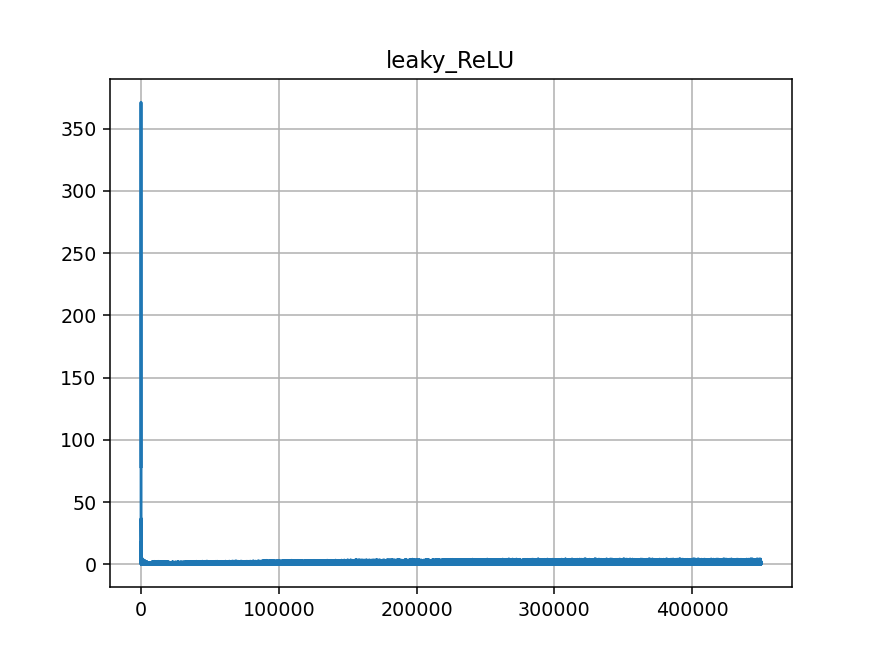

In [46]:
%matplotlib notebook

title = "leaky_ReLU"
plt.plot(all_errors)
plt.title(title)
plt.grid()
plt.savefig(title, dpi=100)

In [47]:
error = 0

for i in range(len(iris_frame["sepal length (cm)"])):
    inp = [iris_frame["sepal length (cm)"][i], iris_frame["sepal width (cm)"][i], 
           iris_frame["petal length (cm)"][i], iris_frame["petal width (cm)"][i]]
    
    goal_pred = iris_frame["target"][i]

    layer_2 = np.dot(inp, weight_1_2)
    pred = [leaky_ReLU(i) for i in np.dot(layer_2, weight_2_3)]

    print("max score:", max(pred), "\n---\nPosition:", pred.index(max(pred)), "\n---\nGoal prediction:", goal_pred, "\n\n")
        
    if pred.index(max(pred)) != goal_pred:
        error += 1
        
print("error =", error)

max score: 1.0053304766607511 
---
Position: 0 
---
Goal prediction: 0 


max score: 0.6978907393205145 
---
Position: 0 
---
Goal prediction: 0 


max score: 0.9106278176105416 
---
Position: 0 
---
Goal prediction: 0 


max score: 0.7981640274709697 
---
Position: 0 
---
Goal prediction: 0 


max score: 1.0958450585886168 
---
Position: 0 
---
Goal prediction: 0 


max score: 1.1914274882818185 
---
Position: 0 
---
Goal prediction: 0 


max score: 1.0713635564593282 
---
Position: 0 
---
Goal prediction: 0 


max score: 0.9245746009554741 
---
Position: 0 
---
Goal prediction: 0 


max score: 0.7317760193633005 
---
Position: 0 
---
Goal prediction: 0 


max score: 0.7038162967298519 
---
Position: 0 
---
Goal prediction: 0 


max score: 1.050985174439978 
---
Position: 0 
---
Goal prediction: 0 


max score: 0.9343333071780628 
---
Position: 0 
---
Goal prediction: 0 


max score: 0.6864762498931655 
---
Position: 0 
---
Goal prediction: 0 


max score: 0.8852665448382608 
---
Posi